In [51]:
import cv2 as cv
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

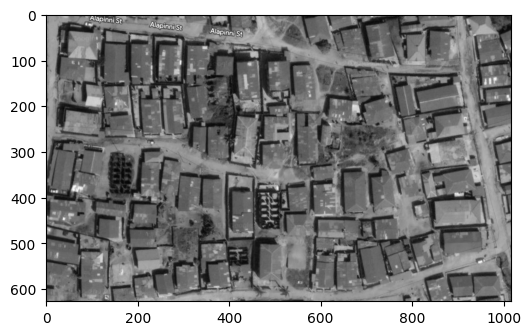

In [52]:
# Load the image in grayscale mode
image = cv.imread('./topology/top2.png', cv.IMREAD_GRAYSCALE)
image.shape

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.show()

In [53]:
edge_detected = cv.Canny(image, 50, 100)

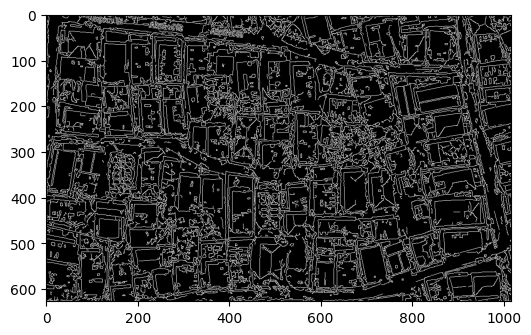

In [54]:
# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(edge_detected, cmap='gray')
plt.show()

In [55]:

#Extract the coordinates of the activation points
points = np.argwhere(edge_detected == 255)

# Swap x and y columns
points = points[:, ::-1]  


# Apply DBSCAN clustering
distance_threshold = 50
min_samples = 5
dbscan = DBSCAN(eps=distance_threshold, min_samples=min_samples)
dbscan.fit(points)

# print(dbscan.labels_)

hulls = []
# Draw bounding polygons around each cluster
for cluster_label in set(dbscan.labels_):
    if cluster_label == -1:
        # Ignore the noise points
        continue
    
    # Get the points in the current cluster
    cluster_points = points[dbscan.labels_ == cluster_label]
    
    # Find the convex hull of the cluster points
    hull = cv.convexHull(cluster_points)
    hulls.append(hull)
    
    # Draw the bounding polygon
    cv.polylines(edge_detected, [hull], True, 255, 1)


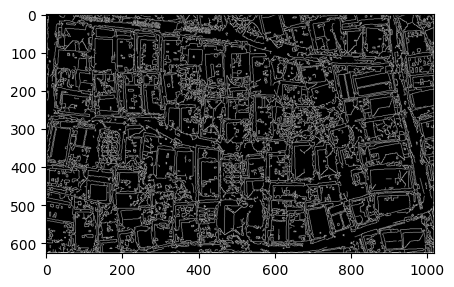

In [56]:
# Show the image with bounding polygons
plt.figure(figsize=(5, 5))
plt.imshow(edge_detected, cmap='gray')
plt.show()

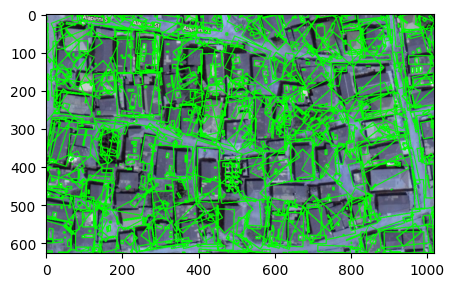

In [50]:
image = cv.imread('./topology/top2.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Edge detection
edges = cv.Canny(gray, 50, 150)

# Find contours
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw bounding polygons
for cnt in contours:
    rect = cv.minAreaRect(cnt)
    box = cv.boxPoints(rect)
    box = box.astype('int')
    cv.drawContours(image, [box], 0, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.show()

In [1]:
import cv2
import numpy as np
import random

# Create a blank 512x512 grayscale image
image = np.zeros((512, 512), dtype=np.uint8)

# Draw 20 non-intersecting houses as squares
for i in range(20):
    x = random.randint(10, 492)
    y = random.randint(10, 492)
    cv2.rectangle(image, (x, y), (x + 20, y + 20), 255, 2)

# Draw a hill as a circle
cv2.circle(image, (256, 256), 50, 255, 2)

# Draw 3 free-form polygon valleys
for i in range(3):
    points = np.array([[random.randint(10, 502), random.randint(10, 502)] for _ in range(4)], dtype=np.int32)
    cv2.polylines(image, [points], True, 255, 2)

# Draw a hospital, gas station, and public park as rectangles
cv2.rectangle(image, (100, 100), (150, 130), 255, 2)  # Hospital
cv2.rectangle(image, (200, 200), (240, 230), 255, 2)  # Gas station
cv2.rectangle(image, (300, 300), (360, 340), 255, 2)  # Public park

# Draw a free-form river as a series of connected lines
points = np.array([[random.randint(10, 502), random.randint(10, 502)] for _ in range(10)], dtype=np.int32)
cv2.polylines(image, [points], False, 255, 2)

# Display the resulting map using OpenCV
cv2.imshow('Map', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np
import random

def draw_quadratic_bezier_curve(img, p0, p1, p2, color, thickness):
    points = []
    for t in np.linspace(0, 1, num=100):
        x = (1 - t)**2 * p0[0] + 2 * (1 - t) * t * p1[0] + t**2 * p2[0]
        y = (1 - t)**2 * p0[1] + 2 * (1 - t) * t * p1[1] + t**2 * p2[1]
        points.append((int(x), int(y)))
    
    for i in range(len(points) - 1):
        cv2.line(img, points[i], points[i+1], color, thickness)

# Create a blank 512x512 grayscale image
image = np.zeros((512, 512), dtype=np.uint8)

# Draw 20 non-intersecting houses as squares
for i in range(20):
    x = random.randint(10, 492)
    y = random.randint(10, 492)
    cv2.rectangle(image, (x, y), (x + 20, y + 20), 255, 2)

# Draw a hill as a circle
cv2.circle(image, (256, 256), 50, 255, 2)

# Draw 3 free-form polygon valleys
for i in range(3):
    points = np.array([[random.randint(10, 502), random.randint(10, 502)] for _ in range(4)], dtype=np.int32)
    cv2.polylines(image, [points], True, 255, 2)

# Draw a hospital, gas station, and public park as rectangles
cv2.rectangle(image, (100, 100), (150, 130), 255, 2)  # Hospital
cv2.rectangle(image, (200, 200), (240, 230), 255, 2)  # Gas station
cv2.rectangle(image, (300, 300), (360, 340), 255, 2)  # Public park

# Draw a free-form river using connected quadratic Bezier curves
num_curves = 5
start_point = (random.randint(10, 502), 0)
control_points = [(random.randint(10, 502), (i + 1) * 512 // (num_curves + 1)) for i in range(num_curves)]
end_point = (random.randint(10, 502), 512)

prev_point = start_point
for i in range(num_curves):
    draw_quadratic_bezier_curve(image, prev_point, control_points[i], control_points[(i+1) % num_curves], 255, 2)
    prev_point = control_points[(i+1) % num_curves]
draw_quadratic_bezier_curve(image, prev_point, control_points[-1], end_point, 255, 2)

# Display the resulting map using OpenCV
cv2.imshow('Map', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [39]:
import cv2
import numpy as np
import random

def rects_overlap(rect1, rect2):
    x1, y1, x1b, y1b = rect1
    x2, y2, x2b, y2b = rect2
    return not (x1b < x2 or x2b < x1 or y1b < y2 or y2b < y1)

def draw_cubic_bezier_curve(img, p0, p1, p2, p3, color, thickness):
    points = []
    for t in np.linspace(0, 1, num=100):
        x = (1 - t)**3 * p0[0] + 3 * (1 - t)**2 * t * p1[0] + 3 * (1 - t) * t**2 * p2[0] + t**3 * p3[0]
        y = (1 - t)**3 * p0[1] + 3 * (1 - t)**2 * t * p1[1] + 3 * (1 - t) * t**2 * p2[1] + t**3 * p3[1]
        points.append((int(x), int(y)))
    
    for i in range(len(points) - 1):
        cv2.line(img, points[i], points[i+1], color, thickness)

def random_position(exclude_regions, width, height):
    while True:
        x = random.randint(10, 502 - width)
        y = random.randint(10, 502 - height)
        rect = (x, y, x + width, y + height)
        if not any(rects_overlap(rect, region) for region in exclude_regions):
            return x, y
        
def create_map():
    # Create a blank 512x512 grayscale image
    image = np.zeros((512, 512), dtype=np.uint8)
    exclude_regions = []

    # Draw 20 non-intersecting houses as squares
    for i in range(15):
        x, y = random_position(exclude_regions, 20, 20)
        cv2.rectangle(image, (x, y), (x + 20, y + 20), 255, 2)
        exclude_regions.append((x, y, x + 20, y + 20))

    # Draw a hill as a circle
    cx, cy = random_position(exclude_regions, 100, 100)
    cv2.circle(image, (cx, cy), 40 , 255, 2)

    # Draw a valley as a circle
    cx, cy = random_position(exclude_regions, 100, 100)
    cv2.circle(image, (cx, cy), 30, 255, 2)

    # Draw a hospital, gas station, and public park as rectangles
    x, y = random_position(exclude_regions, 50, 30)
    cv2.rectangle(image, (x, y), (x + 50, y + 30), 255, 2)  # Hospital
    exclude_regions.append((x, y, x + 50, y + 30))

    x, y = random_position(exclude_regions, 40, 30)
    cv2.rectangle(image, (x, y), (x + 40, y + 30), 255, 2)  # Gas station
    exclude_regions.append((x, y, x + 40, y + 30))

    x, y = random_position(exclude_regions, 60, 40)
    cv2.rectangle(image, (x, y), (x + 60, y + 40), 255, 2)  # Public park
    exclude_regions.append((x, y, x + 60, y + 40))

    # Draw a free-form river using a single cubic Bezier curve
    start_point = (random.randint(10, 502), 0)
    end_point = (random.randint(10, 502), 512)
    control_point1 = (random.randint(10, 502), random.randint(128, 384))
    control_point2 = (random.randint(10, 502), random.randint(128, 384))

    draw_cubic_bezier_curve(image, start_point, control_point1, control_point2, end_point, 255, 2)

    # Display the resulting map using OpenCV
    # cv2.imshow('Map', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return image

# def count_intersections(image):
#     # Find contours in the binary image
#     contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # Get bounding rectangles for each contour
#     bounding_rectangles = [cv2.boundingRect(cnt) for cnt in contours]
    
#     # Function to check if two rectangles overlap
#     def rects_overlap(rect1, rect2):
#         x1, y1, w1, h1 = rect1
#         x2, y2, w2, h2 = rect2
#         return not (x1 + w1 < x2 or x2 + w2 < x1 or y1 + h1 < y2 or y2 + h2 < y1)
    
#     # Check for intersecting shapes
#     intersections = 0
#     for i, rect1 in enumerate(bounding_rectangles):
#         for rect2 in bounding_rectangles[i+1:]:
#             if rects_overlap(rect1, rect2):
#                 intersections += 1

#     return intersections

# def count_intersections(image):
#     # Find contours in the binary image
#     contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Create a mask for each contour
#     contour_masks = []
#     for cnt in contours:
#         mask = np.zeros_like(image)
#         cv2.drawContours(mask, [cnt], -1, 255, -1)
#         contour_masks.append(mask)

#     # Check for intersecting shapes
#     intersections = 0
#     for i, mask1 in enumerate(contour_masks):
#         for mask2 in contour_masks[i+1:]:
#             intersection = cv2.bitwise_and(mask1, mask2)
#             if np.any(intersection):
#                 intersections += 1

#     return intersections

from shapely.geometry import Polygon

def count_intersections(image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert contours to Shapely Polygons
    polygons = [Polygon(cnt.squeeze()) for cnt in contours]

    # Check for intersecting shapes
    intersections = 0
    for i, poly1 in enumerate(polygons):
        for poly2 in polygons[i+1:]:
            if poly1.intersects(poly2):
                intersections += 1

    return intersections

In [40]:
while True:
    image = create_map()
    num_intersections = count_intersections(image)
    print(f'Number of intersecting shapes: {num_intersections}')
    if num_intersections == 0:
        break


Number of intersecting shapes: 0


In [41]:
cv2.imshow('Map', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
import cv2
import numpy as np
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import cascaded_union
import random

def random_non_intersecting_polygon(existing_polygons, width, height):
    while True:
        x, y = random.randint(0, 512 - width), random.randint(0, 512 - height)
        new_polygon = Polygon([(x, y), (x + width, y), (x + width, y + height), (x, y + height)])
        
        intersects = False
        for existing_polygon in existing_polygons:
            if new_polygon.intersects(existing_polygon):
                intersects = True
                break
        
        if not intersects:
            return new_polygon

# Initialize the image
image = np.zeros((512, 512), dtype=np.uint8)

# Draw a hill
for _ in range(2):
    hill_radius = 40
    hill_center = (random.randint(hill_radius, 512 - hill_radius), random.randint(hill_radius, 512 - hill_radius))
    cv2.circle(image, hill_center, hill_radius, 255, -1)
    # hill_polygon = Polygon(hill_center).buffer(hill_radius)
    hill_polygon = Polygon([(hill_center[0] + hill_radius * np.cos(angle), hill_center[1] + hill_radius * np.sin(angle)) for angle in np.linspace(0, 2 * np.pi, 100)]).buffer(0)


# Draw valleys
valley_polygons = []
for _ in range(2):
    x, y = random.randint(0, 512 - 1), random.randint(0, 512 - 1)
    valley_polygon = Polygon([(x, y), (x + 1, y), (x + 1, y + 1), (x, y + 1)]).buffer(40)
    valley_polygons.append(valley_polygon)

    for x, y in valley_polygon.exterior.coords:
        cv2.circle(image, (int(x), int(y)), 1, 255, -1)

# Draw houses
house_polygons = []
for _ in range(4):
    house_width, house_height = 20, 20
    house_polygon = random_non_intersecting_polygon(house_polygons + valley_polygons + [hill_polygon], house_width, house_height)
    house_polygons.append(house_polygon)

    x, y = int(house_polygon.bounds[0]), int(house_polygon.bounds[1])
    cv2.rectangle(image, (x, y), (x + house_width, y + house_height), 255, -1)

# Draw hospital, gas station, and public park
building_labels = ["Hospital", "Gas Station", "Public Park"]
for label in building_labels:
    building_width, building_height = random.randint(30, 60), random.randint(30, 60)
    building_polygon = random_non_intersecting_polygon(house_polygons + valley_polygons + [hill_polygon], building_width, building_height)
    house_polygons.append(building_polygon)

    x, y = int(building_polygon.bounds[0]), int(building_polygon.bounds[1])
    cv2.rectangle(image, (x, y), (x + building_width, y + building_height), 255, -1)
    # cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)

# cv2.imshow("Random Map", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()





import networkx as nx

def get_polygon_center(polygon):
    x, y = np.array(polygon.centroid.coords).squeeze()
    return int(x), int(y)

# Extract center points of shapes
# center_points = []
# for polygon in [hill_polygon] + valley_polygons + house_polygons:
#     center_points.append(get_polygon_center(polygon))

# # Create a complete graph using the NetworkX library
# G = nx.complete_graph(len(center_points))

# # Set the node positions to the center points of the shapes
# pos = {i: center_points[i] for i in range(len(center_points))}
# nx.set_node_attributes(G, pos, "pos")

# Visualize the graph
# image_with_graph = image.copy()
# for i, j in G.edges():
#     cv2.line(image_with_graph, center_points[i], center_points[j], 128, 1)

# cv2.imshow("Graph", image_with_graph)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


#Extract center points of shapes
center_points = []
for polygon in house_polygons:
    center_points.append(get_polygon_center(polygon))

# Create a complete graph using the NetworkX library
G = nx.complete_graph(len(center_points))

# Set the node positions to the center points of the shapes
pos = {i: center_points[i] for i in range(len(center_points))}
nx.set_node_attributes(G, pos, "pos")

# Visualize the graph
image_with_graph = image.copy()
for i, j in G.edges():
    cv2.line(image_with_graph, center_points[i], center_points[j], 128, 1)

# cv2.imshow("Graph", image_with_graph)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
from shapely.geometry import LineString
import math

# Check if a line segment intersects with a polygon
def line_intersects_polygon(line_start, line_end, polygon):
    line = LineString([line_start, line_end])
    return line.intersects(polygon)

# Calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Calculate the edge weight based on the distance and the presence of hills or valleys
# def edge_weight(p1, p2, hill_polygon, valley_polygons):
#     weight = euclidean_distance(p1, p2)
#     if line_intersects_polygon(p1, p2, hill_polygon) or any(line_intersects_polygon(p1, p2, valley) for valley in valley_polygons):
#         weight *= 3
#     return weight

def edge_weight(p1, p2, hill_polygon, valley_polygons):
    weight = euclidean_distance(p1, p2)
    line = LineString([p1, p2])
    
    if line.intersects(hill_polygon):
        weight *= 2
    
    if any(line.intersects(valley) for valley in valley_polygons):
        weight *= 3

    return weight


# Add edge weights based on the distance and the presence of hills or valleys
# for i, j in G.edges():
#     G[i][j]['weight'] = edge_weight(center_points[i], center_points[j], hill_polygon, valley_polygons)

# # Find the minimum spanning tree
# mst = nx.minimum_spanning_tree(G)

# # Visualize the minimum spanning tree
# image_with_mst = image.copy()
# for i, j in mst.edges():
#     cv2.line(image_with_mst, center_points[i], center_points[j], 128, 1)

# cv2.imshow("MST", image_with_mst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Add edge weights based on the distance and the presence of hills or valleys
for i, j in G.edges():
    G[i][j]['weight'] = edge_weight(center_points[i], center_points[j], hill_polygon, valley_polygons)

# Visualize the graph with edge weights
image_with_graph_weights = image.copy()
for i, j in G.edges():
    cv2.line(image_with_graph_weights, center_points[i], center_points[j], 128, 1)
    
    # Calculate the midpoint of the edge
    midpoint = ((center_points[i][0] + center_points[j][0]) // 2, (center_points[i][1] + center_points[j][1]) // 2)
    
    # Draw the edge weight as a text label
    weight = int(G[i][j]['weight'])
    cv2.putText(image_with_graph_weights, str(weight), midpoint, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)

# cv2.imshow("Graph with Weights", image_with_graph_weights)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2.imwrite("graph_with_weights.png", image_with_graph_weights)




True